Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data set
coca_data= pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coca_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Data Exploration

In [3]:
coca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
coca_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
# checking for null values
coca_data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
# checking for duplicate values
coca_data[coca_data.duplicated()]

,Quarter,Sales


### Data pre-processing

In [7]:
# convert the quarter into the years
coca_data['Q_year']=coca_data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
coca_data.head()

,Quarter,Sales,Q_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [8]:
# convert quarter year into quarter date formate
coca_data['Date'] = (pd.to_datetime(coca_data['Q_year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
coca_data.head()

,Quarter,Sales,Q_year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [9]:
# Extract quater from Q_year column
coca_data['Quarters'] = 0

for i in range(42):
    n = coca_data['Q_year'][i]
    coca_data['Quarters'][i] = n[0:2]
    
coca_data.head(10)

,Quarter,Sales,Q_year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [10]:
#Create dummy variable for quarters
dummy = pd.DataFrame(pd.get_dummies(coca_data['Quarters']))
data= pd.concat((coca_data, dummy), axis=1)
data.head()

,Quarter,Sales,Q_year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [11]:
#drop the unnecessary columns
data.drop(['Quarter','Q_year'] , axis =1, inplace = True)
data.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [12]:
# Making the Date as DateTime index for the Dataframe
df = data.copy()
df.set_index('Date',inplace=True)
df.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
Date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


### Data Visualization

<AxesSubplot:xlabel='Date'>

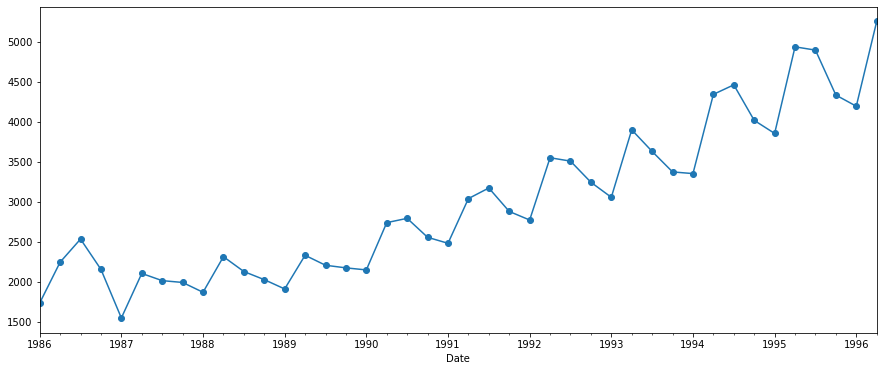

In [13]:
# line plot
df.Sales.plot(figsize=(15, 6),marker='o')

We can see that there is an increasing trend, So trend is not constant. Variance is also not constant. Hence the time serise is not stationary.

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

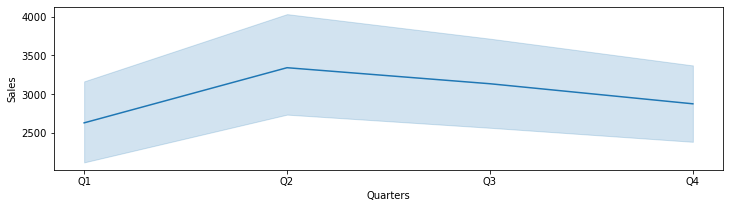

In [14]:
# Line Plot Using Quarters as Y axis and Sales as X axis
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarters", y="Sales", data=df)

In [15]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b")
data["year"] = data.Date.dt.strftime("%Y") 
data.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987


<AxesSubplot:xlabel='Quarters', ylabel='year'>

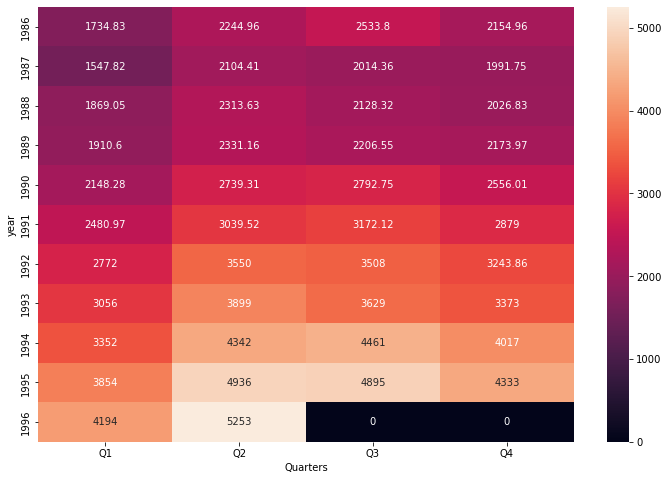

In [16]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Sales'>

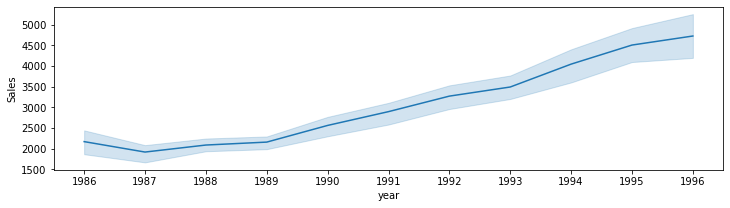

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=data)

Quarter Q2 have higher sales in the years.Sales increase every year.

<AxesSubplot:xlabel='year', ylabel='Sales'>

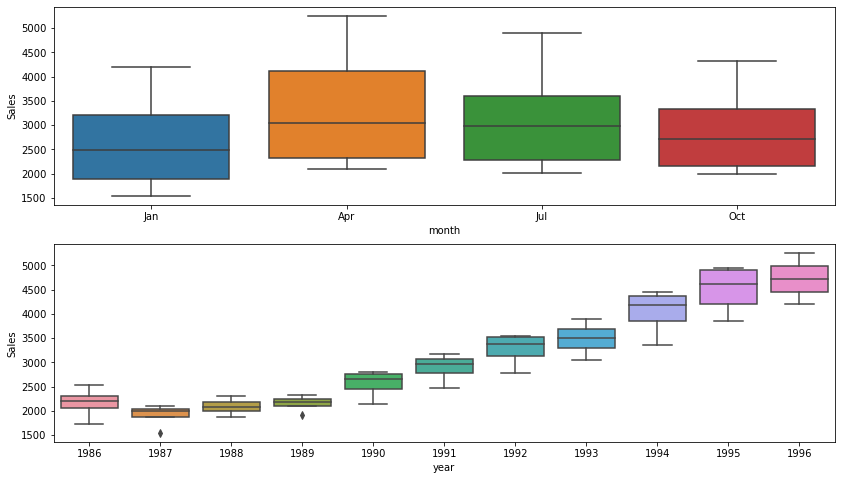

In [18]:
# Box Plot of Each Year by Quaterly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=data)

Similar observations can be concluded from boxplot as well.

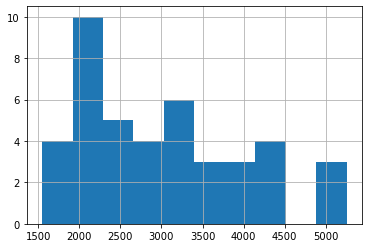

In [19]:
# Histogram
df.Sales.hist()
plt.show()

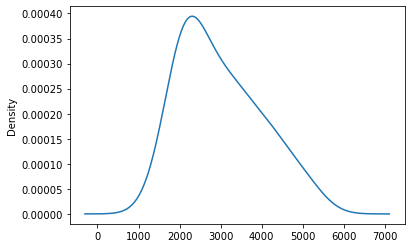

In [20]:
# create a density plot
df.Sales.plot(kind='kde')
plt.show()

### Lag plot

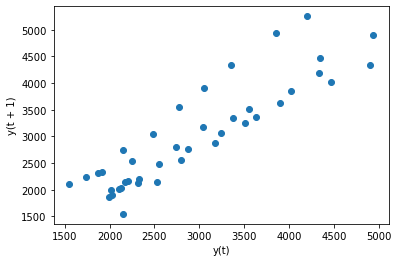

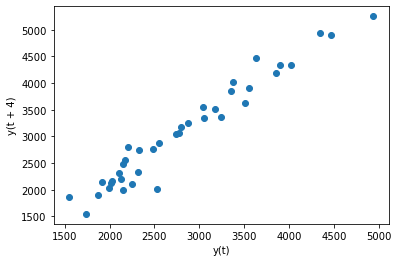

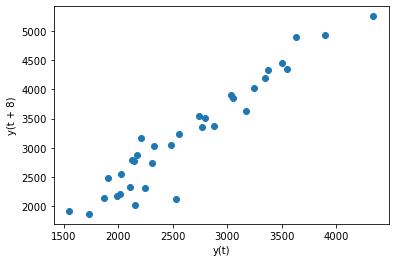

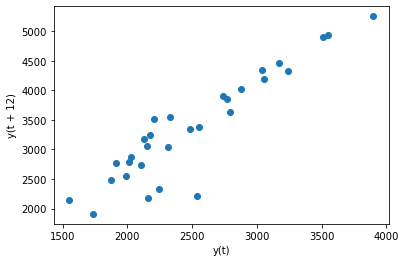

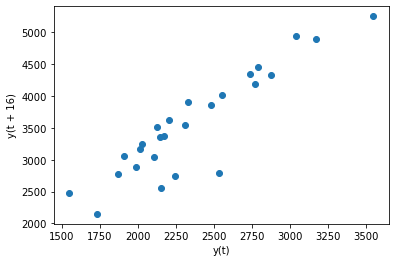

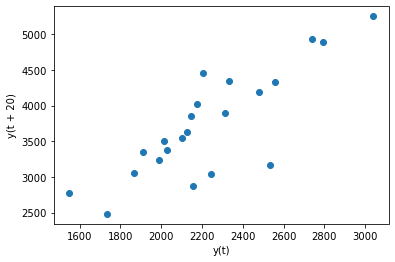

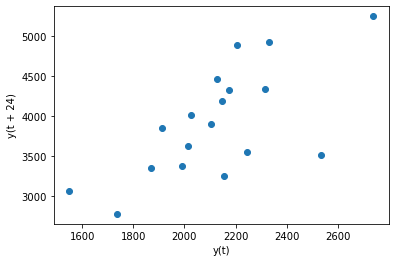

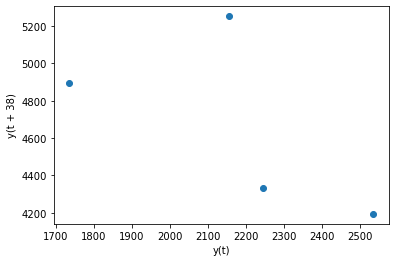

In [21]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1,4, 8, 12, 16, 20, 24, 38]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Sales, lag=i)
    plt.show()

### Moving Average

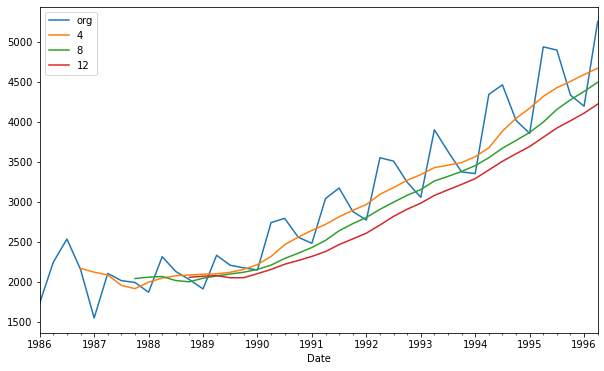

In [22]:

plt.figure(figsize=(10,6))
df.Sales.plot(label="org")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

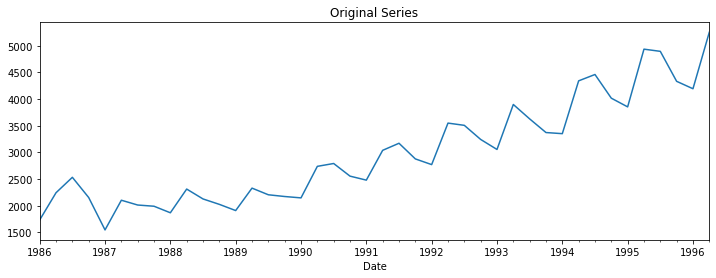

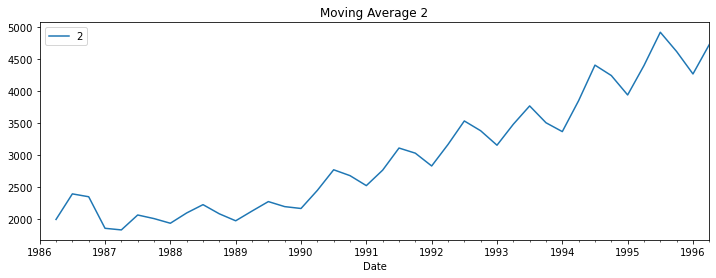

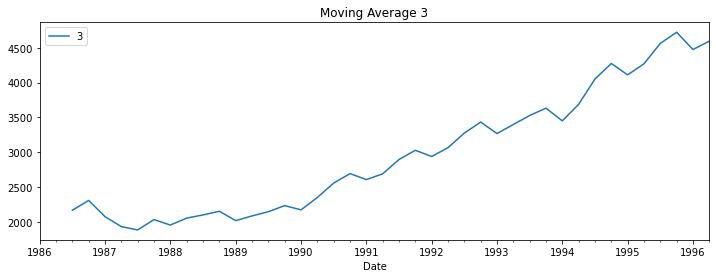

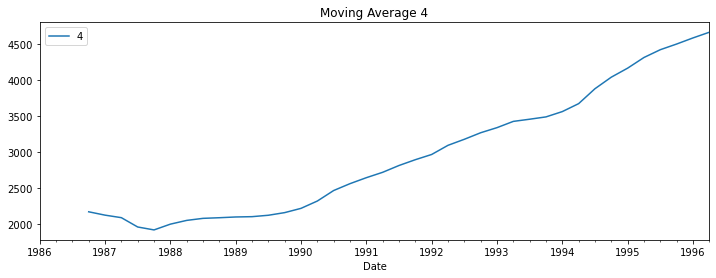

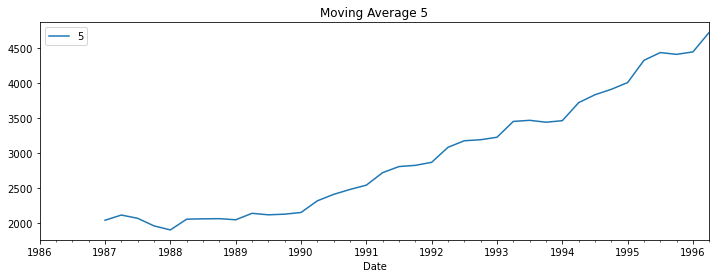

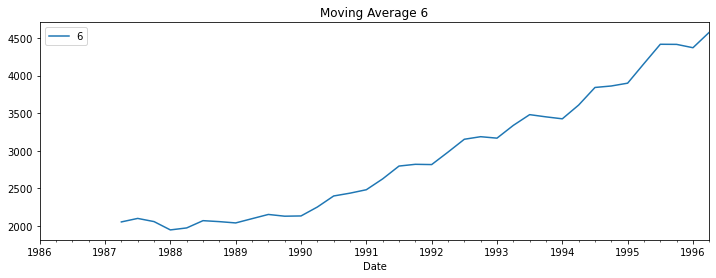

In [23]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7):
    plt.figure(figsize=(12,4))
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

### Time series decomposition plot

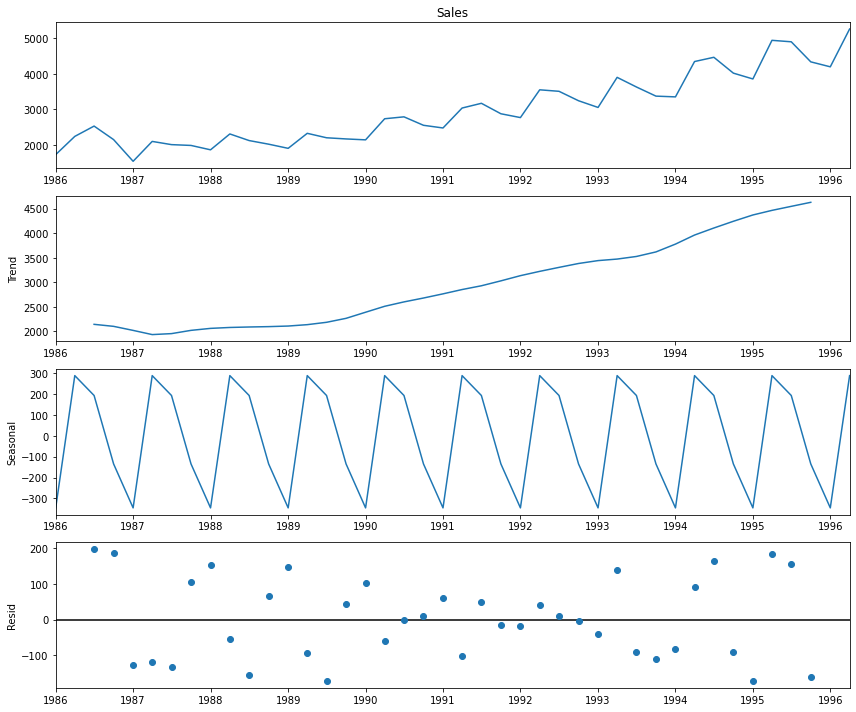

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

+ 1st graph is the original plot.
+ Second grah shows the trend of data.
+ Third graph shows seasonality in the data.
+ 4th graph shows the noise in data.

### ACF Plot

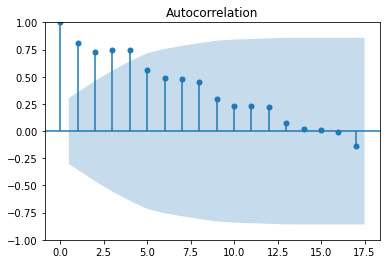

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
acf =tsa_plots.plot_acf(df["Sales"])      

### PACF Plot

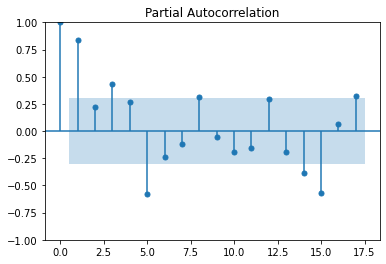

In [26]:
pacf =tsa_plots.plot_pacf(df["Sales"])  

### Resampling and interpolation

In [27]:
# upsampling with respect to month
Sample_df=df.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
Sample_df=Sample_df.resample('M').mean()
Sample_df.head(10)

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN
1986-06-30,NaN
1986-07-31,2533.804993
1986-08-31,NaN
1986-09-30,NaN


In [28]:
 # interplation was done for nan values which we get after doing upsampling by month
Inter_df=Sample_df.interpolate(method='linear')
Inter_df.head(10)

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
1986-06-30,2437.523661
1986-07-31,2533.804993
1986-08-31,2407.524328
1986-09-30,2281.243663


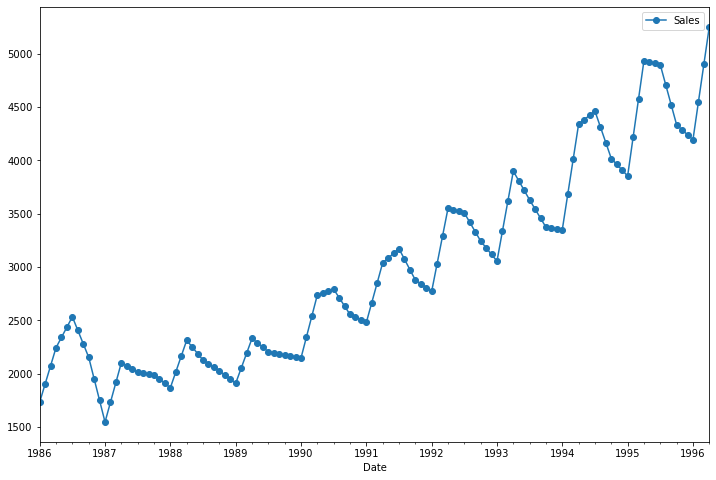

In [29]:
# line plot
Inter_df.plot(figsize=(12, 8),marker='o')
plt.show()

### Visulization of Resampling data

In [30]:
visual_df= Inter_df.copy()
visual_df.reset_index(inplace=True)
visual_df['date'] = pd.to_datetime(visual_df['Date'])
visual_df['year'] = visual_df['Date'].dt.year
visual_df['month'] = visual_df['Date'].dt.month
visual_df['week'] = visual_df['Date'].dt.isocalendar().week
visual_df['quarter'] = visual_df['Date'].dt.quarter
visual_df['day_of_week'] = visual_df['Date'].dt.day_name()
visual_df.drop('Date', axis =1 , inplace= True)
visual_df.head(15)

,Sales,date,year,month,week,quarter,day_of_week
0,1734.827000,1986-01-31,1986,1,5,1,Friday
1,1904.871666,1986-02-28,1986,2,9,1,Friday
2,2074.916332,1986-03-31,1986,3,14,1,Monday
3,2244.960999,1986-04-30,1986,4,18,2,Wednesday
4,2341.242330,1986-05-31,1986,5,22,2,Saturday
5,2437.523661,1986-06-30,1986,6,27,2,Monday
6,2533.804993,1986-07-31,1986,7,31,3,Thursday
7,2407.524328,1986-08-31,1986,8,35,3,Sunday
8,2281.243663,1986-09-30,1986,9,40,3,Tuesday
9,2154.962997,1986-10-31,1986,10,44,4,Friday


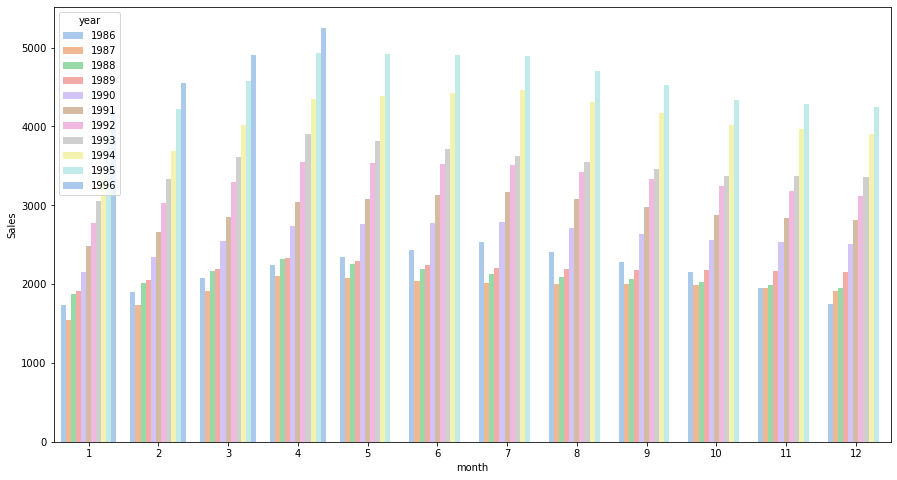

In [31]:
# visualization of sales year wise
visual_df = visual_df.sort_values(by='year')
plt.figure(figsize=(15,8))
sns.barplot(y="Sales", x="month",hue="year",data=visual_df,palette="pastel")
plt.show()

Highest sales are made in April,May,June,July month and then decreases in January.Sales are increasing gradually from 1986 to 1995.We don't have enough data for 1996


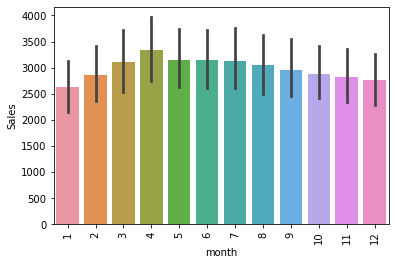

In [32]:
# visualization of Sales month wise
visual_df = visual_df.sort_values(by='month', ascending=False)
sns.barplot(y=visual_df["Sales"], x=visual_df["month"])
plt.xticks(rotation = 90, fontsize = 10) 
plt.show()

As we show that April month have higest sales.

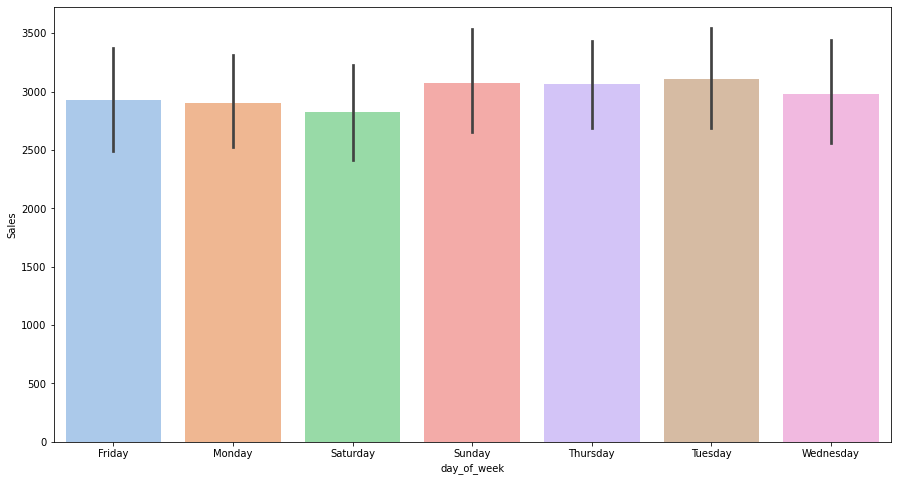

In [33]:
visual_df = visual_df.sort_values(by='day_of_week')
plt.figure(figsize=(15,8))
sns.barplot(y="Sales", x="day_of_week",data=visual_df,palette="pastel")
plt.show()

As we show that higest sales is made on Tuesday

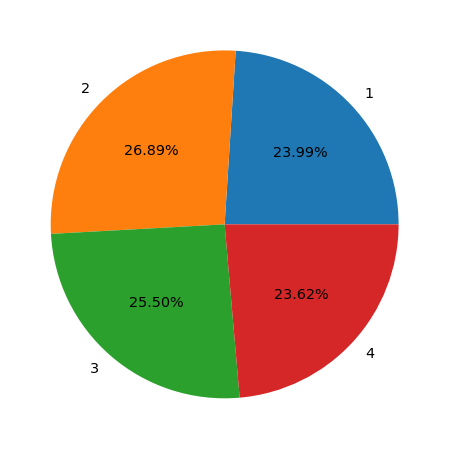

In [34]:
plt.figure(figsize=(10,8))
visual_df = visual_df.groupby('quarter').agg({"Sales" : "mean"}).reset_index() 
plt.pie(visual_df['Sales'],labels=visual_df['quarter'],autopct = '%.2f%%',textprops = {'size' : 'x-large'})
plt.show()

As we show that Quarter 2 have higest percentage of sales.

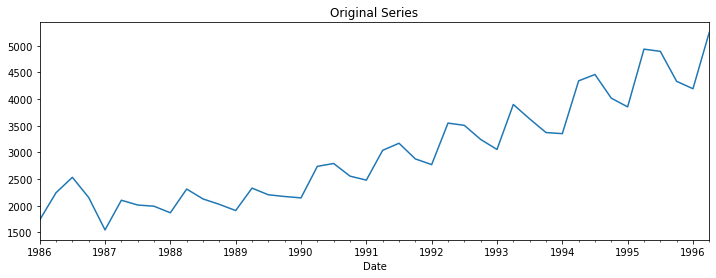

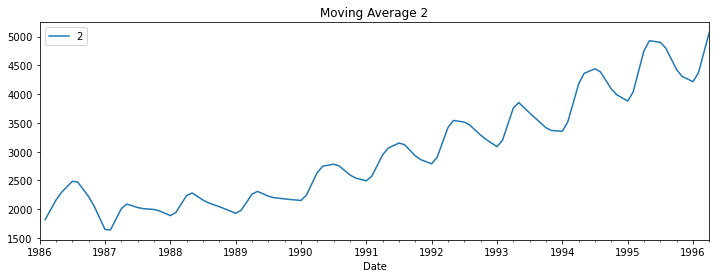

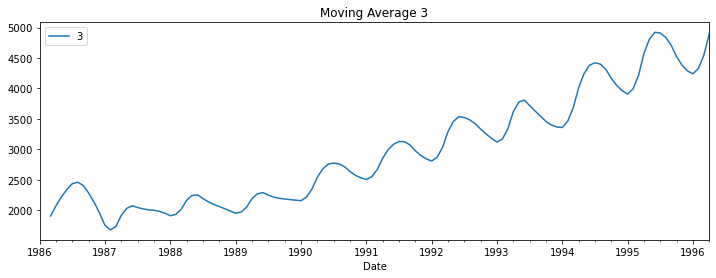

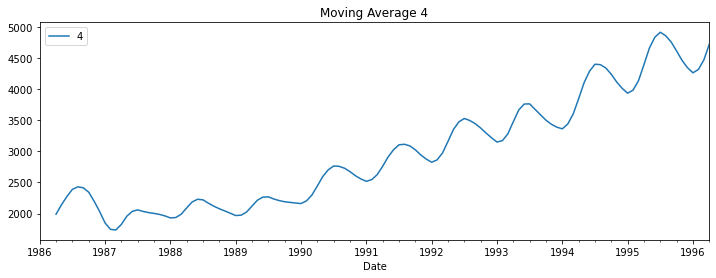

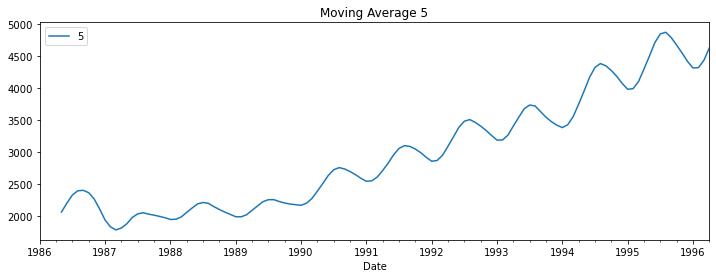

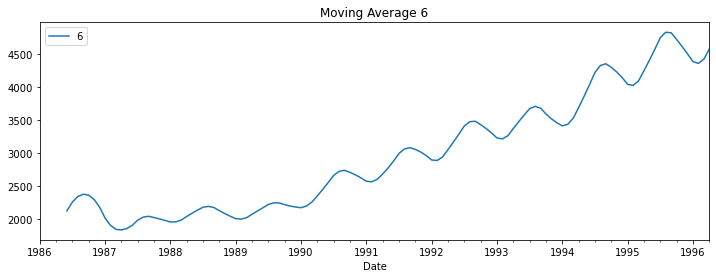

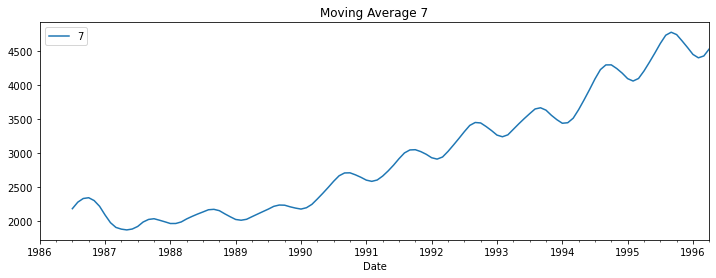

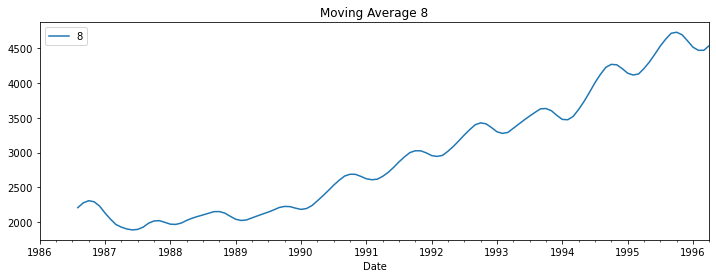

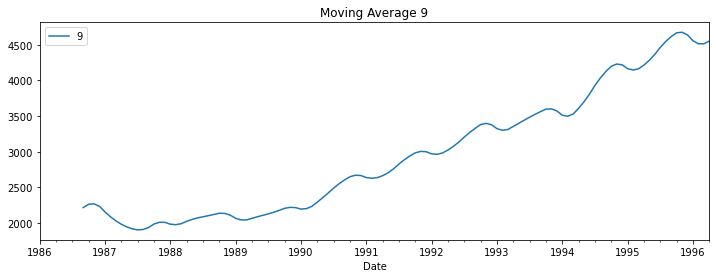

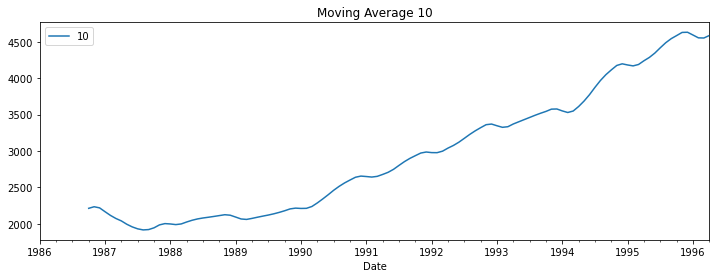

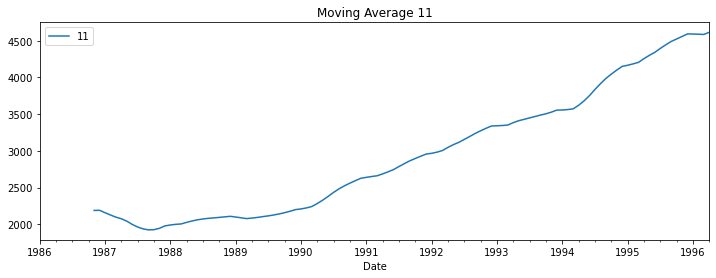

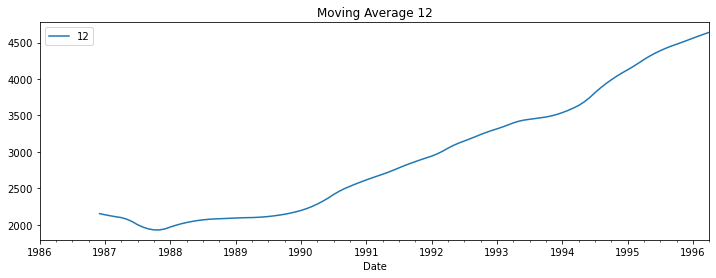

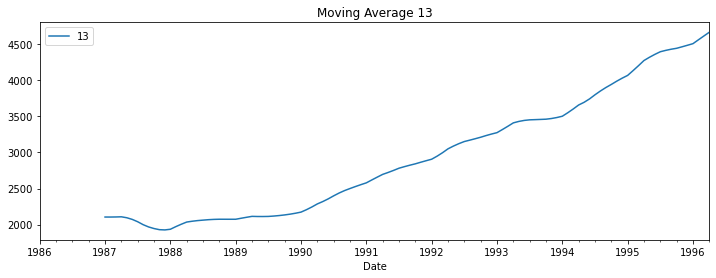

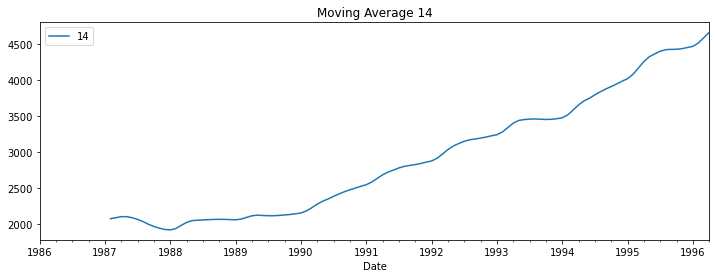

In [35]:
# Moving averages
plt.figure(figsize=(12,4))
Inter_df.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,15):
    plt.figure(figsize=(12,4))
    Inter_df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

### Time series decomposition plot

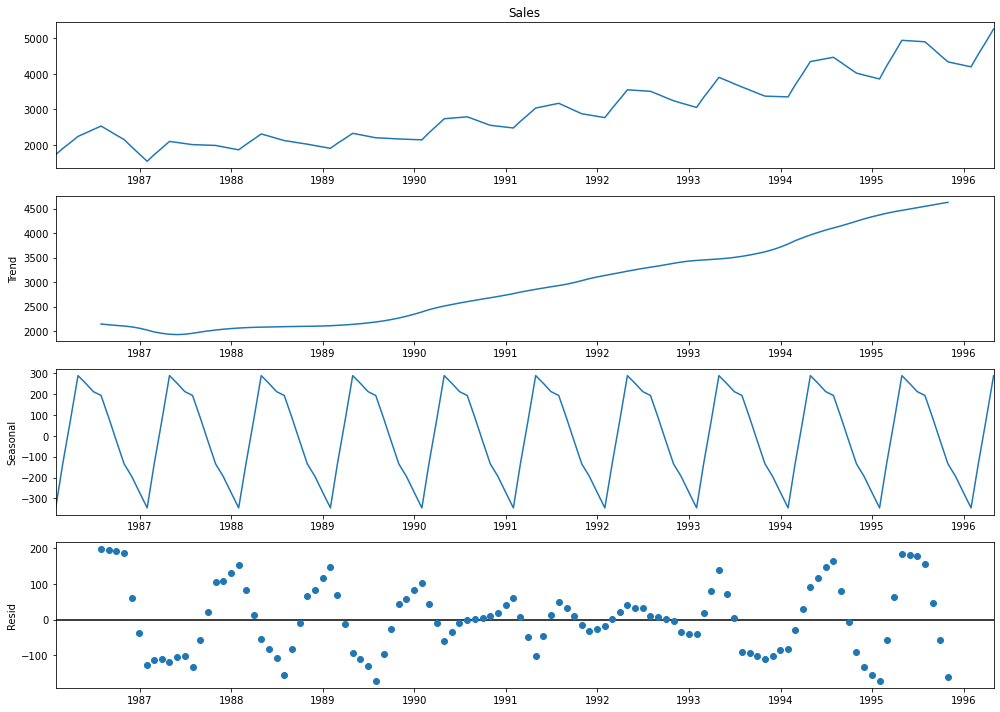

In [36]:
# Additive Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Inter_df.Sales,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

As we show that trend is increasing.Seasonal varies from -300 to +300 with mean= 0 and each cycle represent each year.The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year.

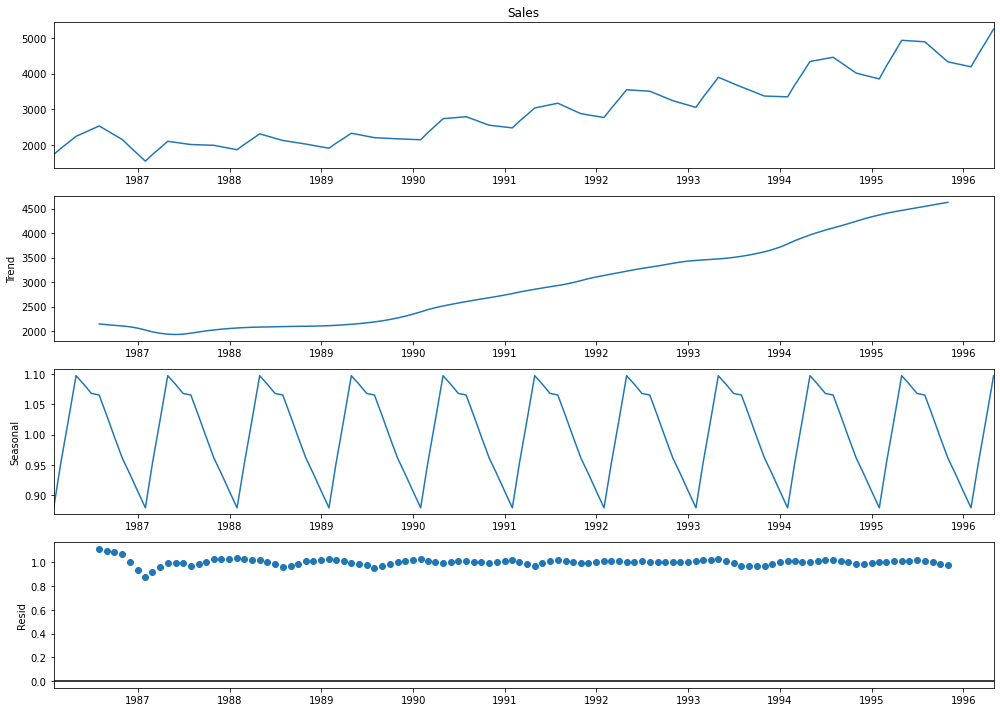

In [37]:
# Multiplicative Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Inter_df.Sales,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

Varies from 0.8 to 1.10
The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year.

#### Splitting Train and Test Data

In [38]:
Inter_df.shape

(124, 1)

In [39]:
# Leaving Test Data with 2 Years of Time Series
train_data = Inter_df[:100]
test_data = Inter_df[100:]

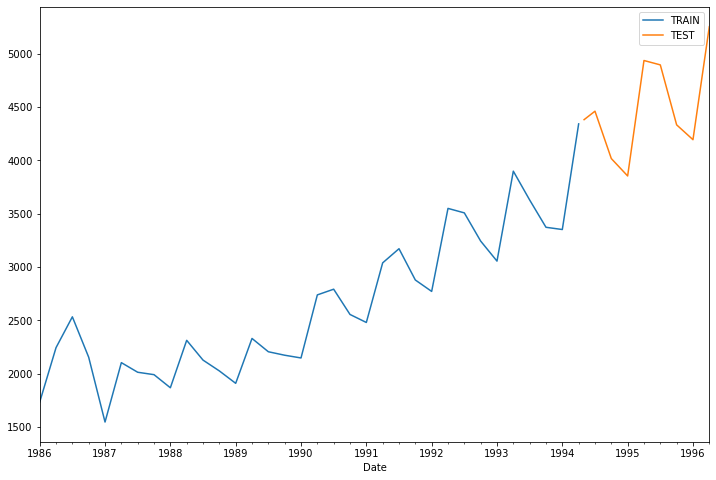

In [40]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST',figsize=(12,8));

### Evaluation Metric MAPE(Mean absolute percentage error)

In [41]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Exponential Methods

In [42]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from math import sqrt
from sklearn.metrics import mean_squared_error
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 6.620373886579515 
 Train Root Mean Squared Error = 129.78414718502933 
 Test Root Mean Squared Error = 382.4477417207024


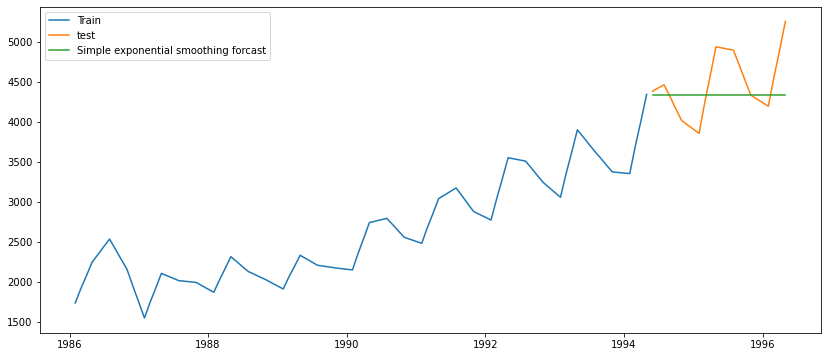

In [43]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

No seasonality captures.Most recent observation gets higher weightages than the older ones for forecasting.

In [44]:
# Holt method (Double Exponential)
des_model  = Holt(train_data).fit(optimized=True)
test_pred_des = des_model.forecast(24)
train_pred_des = des_model.fittedvalues
test_rmse_des = sqrt(mean_squared_error(test_pred_des,test_data.Sales))
train_rmse_des = sqrt(mean_squared_error(train_pred_des,train_data))
mape_des = MAPE(test_pred_des,test_data.Sales)
print('Double Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_des),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_des),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_des))

Double Exponential Method Evaluation 
 Mean Absolute Percent Error = 89.49462512277044 
 Train Root Mean Squared Error = 106.04918278537214 
 Test Root Mean Squared Error = 4549.90795083935


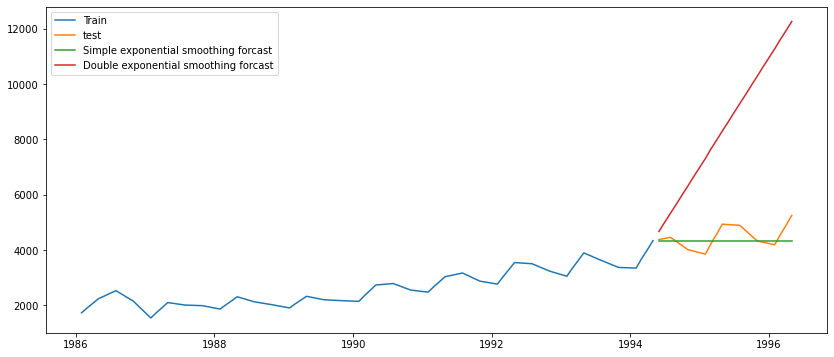

In [45]:

plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

We can see that we are able to capture the trend of the data but the level is on another level.We were not able to capture the seasonality.

In [46]:
# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

tes_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_tes = tes_add_model.forecast(24)
train_pred_ad_tes = tes_add_model.fittedvalues
test_rmse_ad_tes = sqrt(mean_squared_error(test_pred_ad_tes,test_data.Sales))
train_rmse_ad_tes = sqrt(mean_squared_error(train_pred_ad_tes,train_data))
mape_ad_tes = MAPE(test_pred_ad_tes,test_data.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_tes),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_tes),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_tes))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 37.82406870055411 
 Train Root Mean Squared Error = 45.97599540803602 
 Test Root Mean Squared Error = 1938.6377946243854


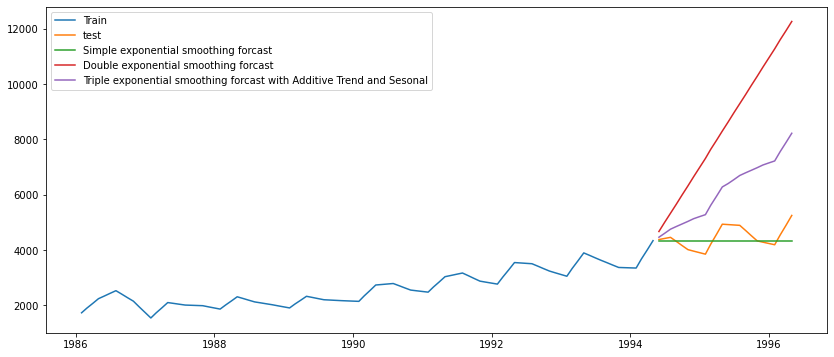

In [47]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

It captures the trend, which we can see that the forecasted values are higher level than the test level.It also captures the seasonality.The peak of the forecasted value is higher than the actual.

In [48]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

tes_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_tes = tes_mul_ad_model.forecast(24)
train_pred_mul_ad_tes = tes_mul_ad_model.fittedvalues
test_rmse_mul_ad_tes = sqrt(mean_squared_error(test_pred_mul_ad_tes,test_data.Sales))
train_rmse_mul_ad_tes = sqrt(mean_squared_error(train_pred_mul_ad_tes,train_data))
mape_mul_ad_tes = MAPE(test_pred_mul_ad_tes,test_data.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_tes),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_tes),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_tes))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 3.6365422435254833 
 Train Root Mean Squared Error = 40.85891607687442 
 Test Root Mean Squared Error = 210.00140597756265


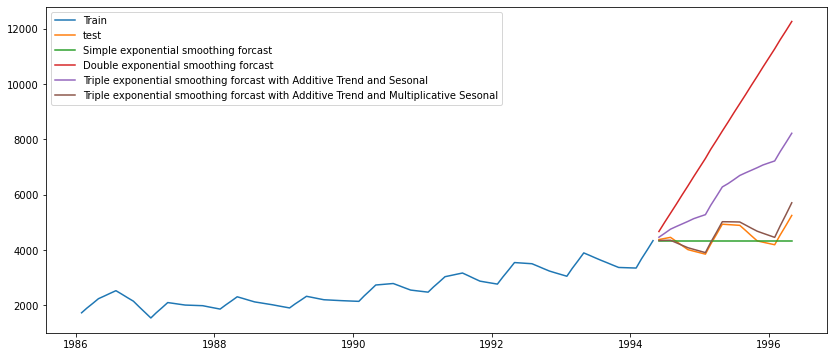

In [49]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

In [50]:
# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential) 
tes_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_tes  = tes_ad_mul_model.forecast(24)
train_pred_ad_mul_tes  = tes_ad_mul_model.fittedvalues
test_rmse_ad_mul_tes  = sqrt(mean_squared_error(test_pred_ad_mul_tes ,test_data.Sales))
train_rmse_ad_mul_tes  = sqrt(mean_squared_error(train_pred_ad_mul_tes ,train_data))
mape_ad_mul_tes  = MAPE(test_pred_ad_mul_tes,test_data.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_tes ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_tes ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_tes ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 5.227066115525063 
 Train Root Mean Squared Error = 169.71546347942615 
 Test Root Mean Squared Error = 270.84004809136763


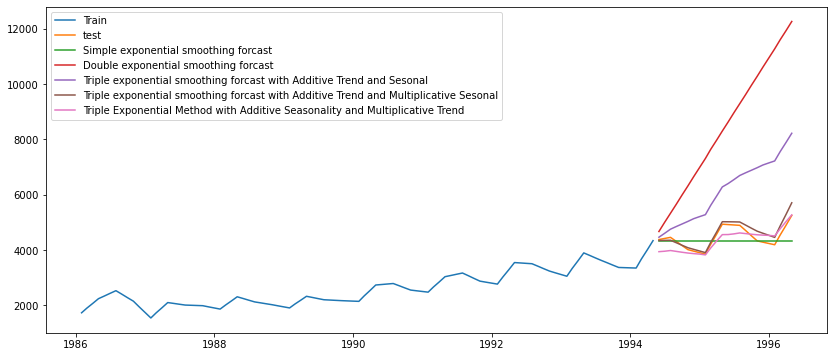

In [51]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_tes, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

In [52]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)
tes_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_tes  = tes_mul_model.forecast(24)
train_pred_mul_tes  = tes_mul_model.fittedvalues
test_rmse_mul_tes  = sqrt(mean_squared_error(test_pred_mul_tes ,test_data.Sales))
train_rmse_mul_tes  = sqrt(mean_squared_error(train_pred_mul_tes ,train_data))
mape_mul_tes  = MAPE(test_pred_mul_tes,test_data.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_tes ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_tes ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_tes ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 6.308444220296386 
 Train Root Mean Squared Error = 40.06681930340377 
 Test Root Mean Squared Error = 366.46433545020244


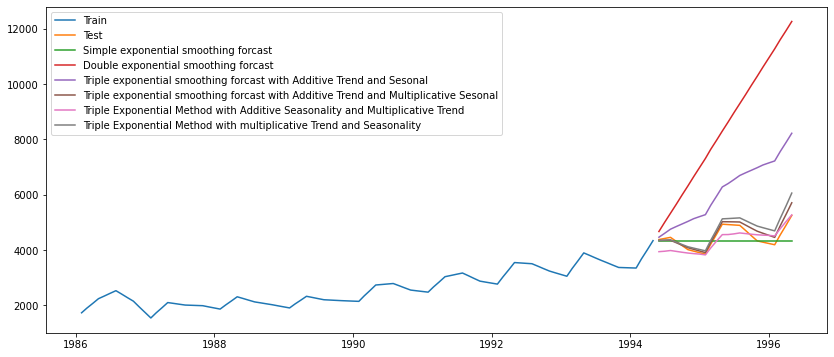

In [53]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_tes, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_tes, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [54]:
# Comparing the results 
results = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul","Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_des,train_rmse_ad_tes,train_rmse_mul_ad_tes,train_rmse_ad_mul_tes,train_rmse_mul_tes]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_des,mape_ad_tes,mape_mul_ad_tes,mape_ad_mul_tes,mape_mul_tes]),\
        "Test_RMSE":pd.Series([test_rmse_ses,test_rmse_des,test_rmse_ad_tes,test_rmse_mul_ad_tes,test_rmse_ad_mul_tes,test_rmse_mul_tes])}
table_results=pd.DataFrame(results)
table_results.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_results

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE
0,Triple_Exp_mul_ad,40.858916,3.636542,210.001406
1,Triple_Exp_ad_mul,169.715463,5.227066,270.840048
2,Triple_Exp_mul,40.066819,6.308444,366.464335
3,Simple_Exp,129.784147,6.620374,382.447742
4,Triple_Exp_ad,45.975995,37.824069,1938.637795
5,Double_Exp,106.049183,89.494625,4549.907951


### Check stationarity using Dickey-Fuller Test

In [55]:
# As we have quarterly data the window size for moving average is equal to 4
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    fig=plt.figure(figsize=(12,10))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

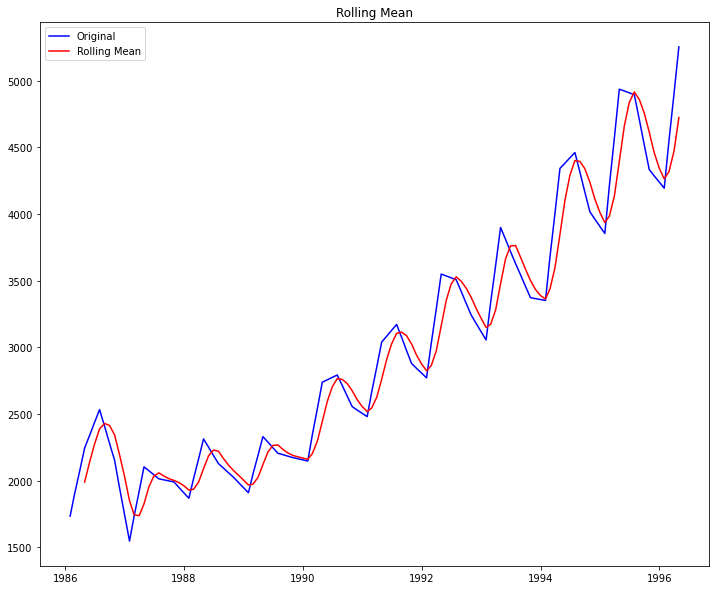

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [56]:
from statsmodels.tsa.stattools import adfuller
sales= pd.DataFrame()
sales['Sales'] = Inter_df[['Sales']]
test_stationarity(sales)

### Augmented Dicky Fuller Test

In [57]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [58]:
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


#### Square Root Transform


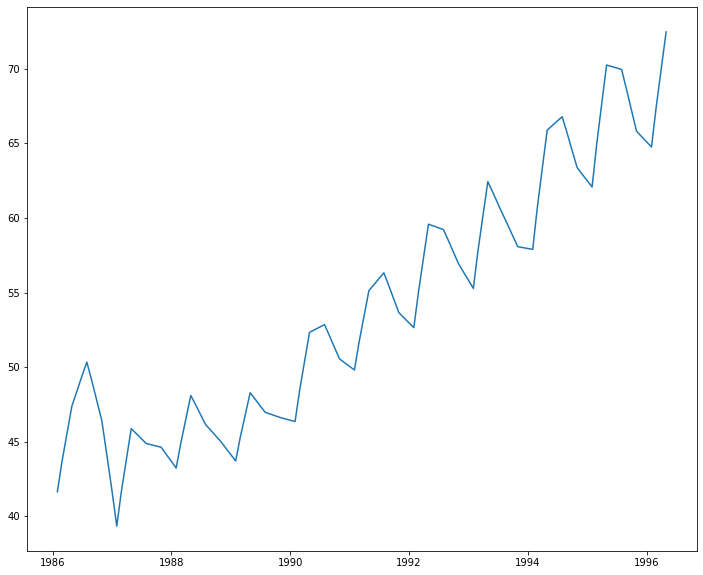

In [59]:
square_root= pd.DataFrame()
square_root = Inter_df[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.plot(square_root['Sales'])


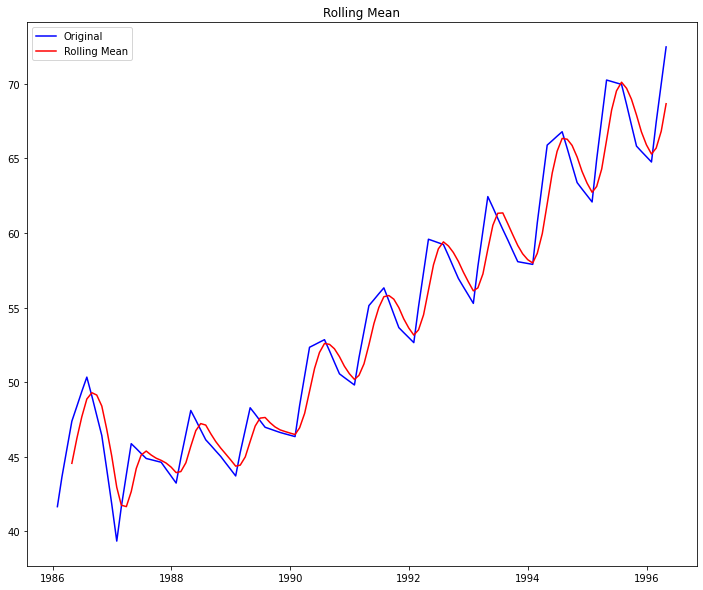

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [60]:
test_stationarity(square_root)

In [61]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


#### Log Transform

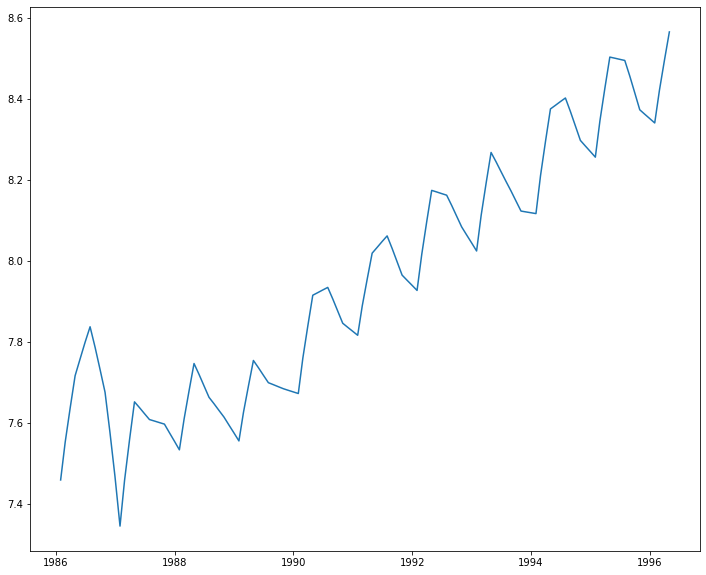

In [62]:
log = pd.DataFrame()
log =Inter_df[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.plot(log['Sales'])



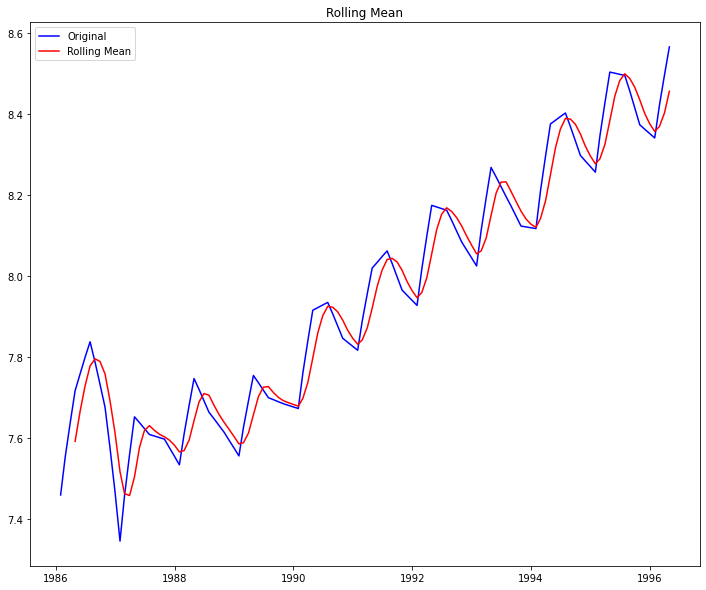

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [63]:
test_stationarity(log)

In [64]:
adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


#### Box Cox Transformation

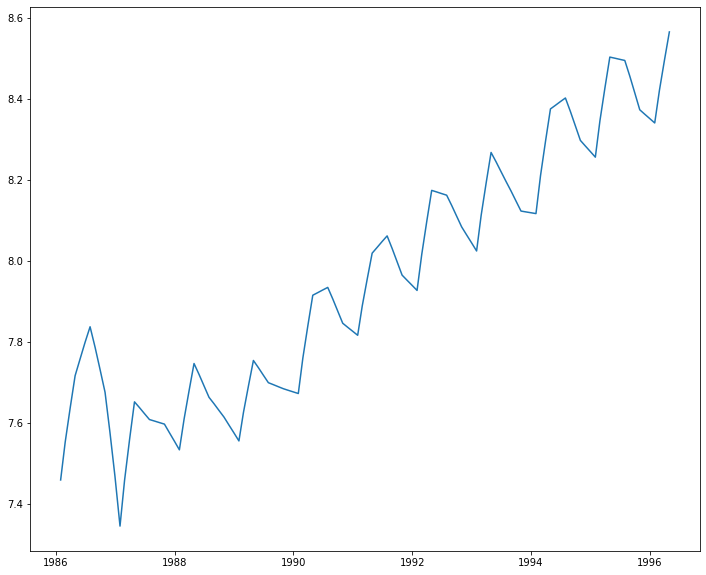

In [65]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(Inter_df['Sales'], lmbda=0),Inter_df.index)
fig=plt.figure(figsize=(12,10))
plt.plot(data_boxcox)
plt.show()

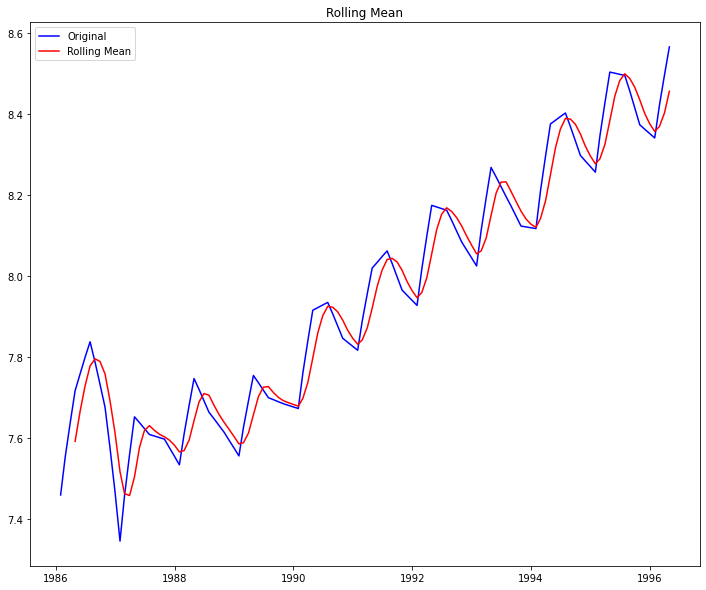

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [66]:
test_stationarity(data_boxcox)

In [67]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


### Differencing Transformation

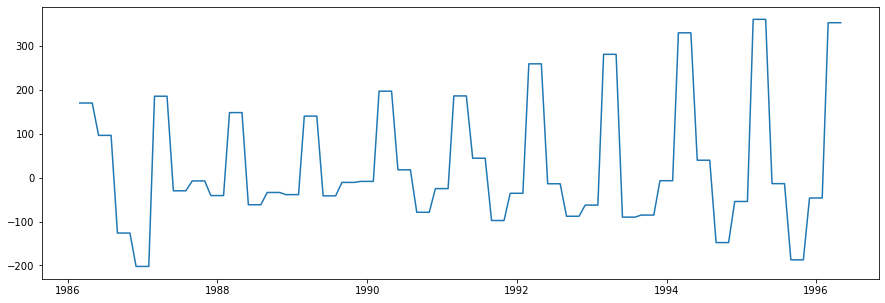

In [68]:
# Use Techniques Differencing 1st time
first_difference = pd.DataFrame()
first_difference = Inter_df[['Sales']]
first_difference['Sales'] = first_difference['Sales']-first_difference['Sales'].shift(1)

fig=plt.figure(figsize=(15,5))
plt.plot(first_difference)
plt.show()

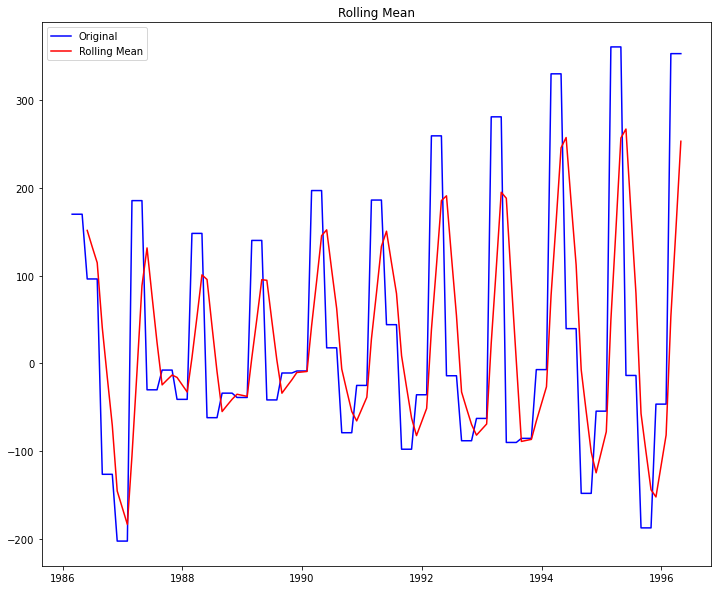

Results of Dickey Fuller Test:
Test Statistic                  -2.420372
p-value                          0.136069
#Lags Used                       9.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [69]:
test_stationarity((first_difference).dropna())

In [70]:
adf_test(first_difference.Sales)

Fail to reject the null hypothesis
Data is non-stationary


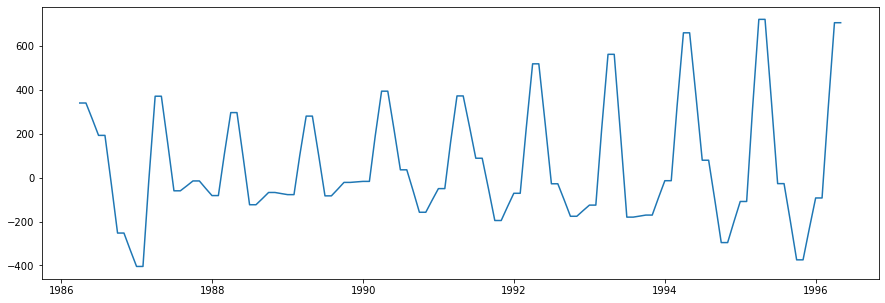

In [71]:
# Use Techniques Differencing 2nd time
second_difference = pd.DataFrame()
second_difference = Inter_df[['Sales']]
second_difference['Sales'] = second_difference['Sales']-second_difference['Sales'].shift(2)

fig=plt.figure(figsize=(15,5))
plt.plot(second_difference)
plt.show()

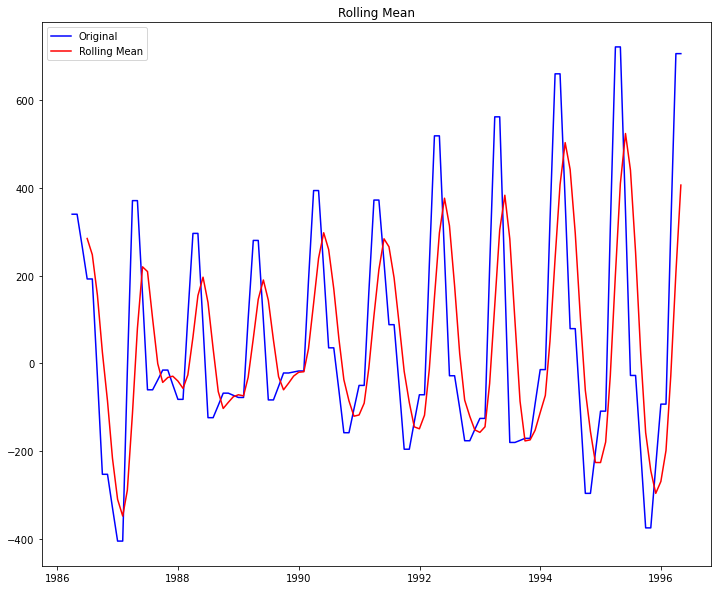

Results of Dickey Fuller Test:
Test Statistic                  -2.424573
p-value                          0.134921
#Lags Used                       8.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [72]:
test_stationarity((second_difference).dropna())

In [73]:
adf_test(second_difference.Sales)

Fail to reject the null hypothesis
Data is non-stationary


#### Differencing of the Box-Cox Transformation

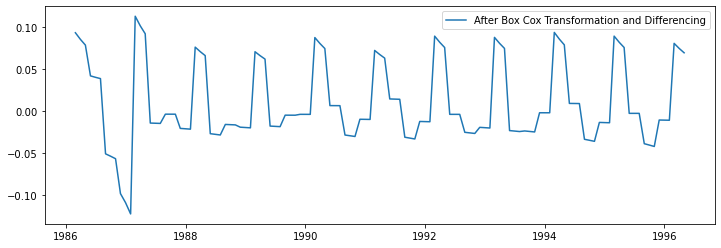

In [74]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

We can see that there is no trend after differencing on the Box Cox transformation.

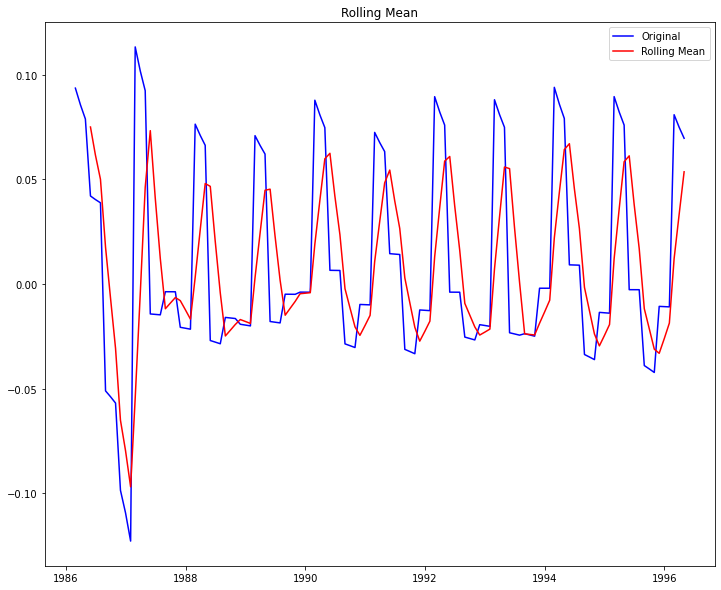

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [75]:
test_stationarity(data_boxcox_diff)

In [76]:
adf_test(data_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


As we show that our  Series is now stationary for AR Forecasting

### Forecasting by ARIMA Model

In [77]:

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


In [78]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [79]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [80]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1994,1,1)
test_dataset_end=datetime(1996,4,1)

In [81]:
train_data_boxcox_diff = data_boxcox_diff[:train_dataset_end]
test_data_boxcox_diff = data_boxcox_diff[train_dataset_end+timedelta(days=1):test_dataset_end]


In [82]:
# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 2)
q_values = range(0, 5)
evaluate_models(train_data_boxcox_diff.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.042
ARIMA(0, 0, 1) RMSE=0.036
ARIMA(0, 0, 2) RMSE=0.028
ARIMA(0, 1, 3) RMSE=0.028
ARIMA(1, 0, 3) RMSE=0.026
ARIMA(1, 0, 4) RMSE=0.025
ARIMA(2, 0, 4) RMSE=0.025
ARIMA(3, 0, 4) RMSE=0.024
ARIMA(5, 0, 3) RMSE=0.023
ARIMA(6, 0, 2) RMSE=0.023
ARIMA(6, 0, 4) RMSE=0.021
ARIMA(8, 0, 2) RMSE=0.018
ARIMA(9, 0, 1) RMSE=0.014
ARIMA(9, 0, 3) RMSE=0.013
ARIMA(9, 0, 4) RMSE=0.012
ARIMA(9, 1, 1) RMSE=0.012
ARIMA(9, 1, 2) RMSE=0.011
ARIMA(9, 1, 4) RMSE=0.011
Best ARIMA(9, 1, 4) RMSE=0.011


## Building ARIMA model with best paramaeter 

In [206]:
model = ARIMA(train_data_boxcox_diff, order=(9, 1, 4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   95
Model:                 ARIMA(9, 1, 4)   Log Likelihood                 229.924
Date:                Tue, 13 Dec 2022   AIC                           -431.849
Time:                        20:11:23   BIC                           -396.242
Sample:                    02-28-1986   HQIC                          -417.466
                         - 12-31-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0204      0.108      0.189      0.850      -0.190       0.231
ar.L2          0.0310      0.116      0.267      0.789      -0.196       0.258
ar.L3         -0.9840      0.085    -11.584      0.000      -1.151      -0.818
ar.L4          0.0519      0.076      0.680      0.497      -0.098       0.202
ar.L5          0.0475      0.079      0.603      0.546      -0.107       0.202
ar.L6         -1.0092      0.051    -19.910      0.000      -1.109      -0.910
ar.L7         -0.0045      0.093     -0.049      0.961      -0.186       0.177
ar.L8          0.0388      0.078      0.500      0.617      -0.114       0.191
ar.L9         -0.8528      0.054    -15.853      0.000      -0.958      -0.747
ma.L1         -0.3800      0.184     -2.069      0.039      -0.740      -0.020
ma.L2         -0.1799      0.301     -0.598      0.550      -0.769       0.410
ma.L3          0.1624      0.215      0.756      0.449      -0.258       0.583
ma.L4         -0.3212      0.213     -1.511      0.131      -0.738       0.095
sigma2         0.0004   5.86e-05      6.328      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               128.06
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

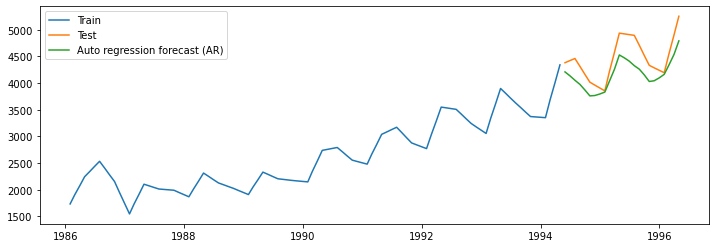

In [207]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_ar = y_hat_ar.cumsum()

y_hat_ar= y_hat_ar.add(data_boxcox.Sales[0])

y_hat_ar = np.exp(y_hat_ar)

plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar[test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

### Model Evaluation

In [116]:
# Root mean square error for ARIMA model
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_hat_ar[test_data.index.min():])).round(2)
rmse_ARIMA

326.7

### MAPE (Mean Absolute Percent Error)

In [121]:
mape_arima = MAPE(y_hat_ar,test_data.Sales)
mape_arima

6.444864291009146

We can see that AR model has done reasonably good job but not better than Holt's method. We souldn't compare it with Holt's method. Because Holt's method captures seasonality

### Analysing the Residuals

In [122]:
model_residual = model_fit.resid
model_residual.mean()

-0.00045297965056001

In [124]:
# Residuals must be stationary
adf_test(model_residual)


Reject the null hypothesis
Data is stationary


### No autocorrelation between residuals

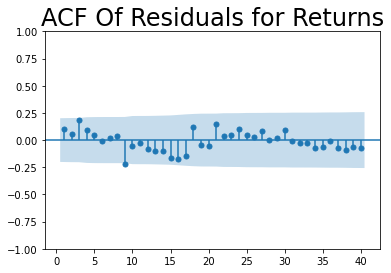

In [126]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()


### Residuals must be random

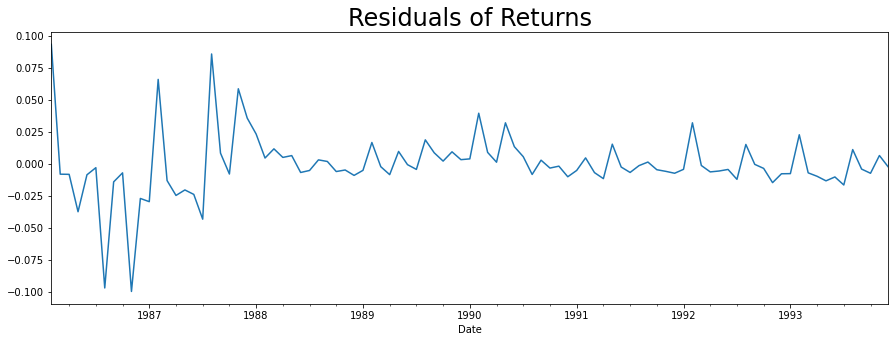

In [130]:
model_residual.plot(figsize=(15,5))
plt.title("Residuals of Returns", size=24)
plt.show()


## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_s = SARIMAX(train_data_boxcox_diff, order=(9,1,4), seasonal_order=(9,1,4,12))
model_fit_s= model.fit()
model_fit_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   95
Model:             SARIMAX(9, 1, 4)x(9, 1, 4, 12)   Log Likelihood                 218.671
Date:                            Thu, 08 Dec 2022   AIC                           -383.342
Time:                                    00:26:58   BIC                           -318.361
Sample:                                02-28-1986   HQIC                          -357.253
                                     - 12-31-1993                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1523     13.637     -0.011      0.991     -26.880      26.576
ar.L2         -0.1216      1.331     -0.091      0.927      -2.730       2.487
ar.L3         -0.2713      2.089     -0.130      0.897      -4.366       3.823
ar.L4         -0.0481      2.205     -0.022      0.983      -4.370       4.274
ar.L5         -0.0848      0.757     -0.112      0.911      -1.569       1.399
ar.L6         -0.5888      1.265     -0.465      0.642      -3.069       1.891
ar.L7         -0.1538      7.296     -0.021      0.983     -14.454      14.146
ar.L8         -0.1550      1.231     -0.126      0.900      -2.569       2.259
ar.L9         -0.1085      2.185     -0.050      0.960      -4.391       4.174
ma.L1         -0.0438     13.506     -0.003      0.997     -26.516      26.428
ma.L2         -0.0803      3.100     -0.026      0.979      -6.155       5.995
ma.L3         -0.4397      1.082     -0.406      0.685      -2.561       1.681
ma.L4         -0.1091      6.915     -0.016      0.987     -13.662      13.444
ar.S.L12      -0.0898     14.620     -0.006      0.995     -28.745      28.566
ar.S.L24       0.1853      1.587      0.117      0.907      -2.925       3.296
ar.S.L36      -0.1148      5.158     -0.022      0.982     -10.224       9.995
ar.S.L48      -0.1848     21.943     -0.008      0.993     -43.192      42.822
ar.S.L60       0.0739     30.773      0.002      0.998     -60.241      60.389
ar.S.L72       0.2773     38.770      0.007      0.994     -75.710      76.265
ar.S.L84       0.0603     22.334      0.003      0.998     -43.714      43.834
ar.S.L96      -0.0085     56.746     -0.000      1.000    -111.229     111.212
ar.S.L108     -0.0377    135.596     -0.000      1.000    -265.801     265.725
ma.S.L12      -0.2799     19.195     -0.015      0.988     -37.902      37.342
ma.S.L24       0.1497     24.162      0.006      0.995     -47.208      47.507
ma.S.L36      -0.0520     48.277     -0.001      0.999     -94.673      94.568
ma.S.L48      -0.1104     48.092     -0.002      0.998     -94.368      94.148
sigma2         0.0002      0.001      0.155      0.876      -0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                59.68
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+18. Standard errors may be unstable.
"""

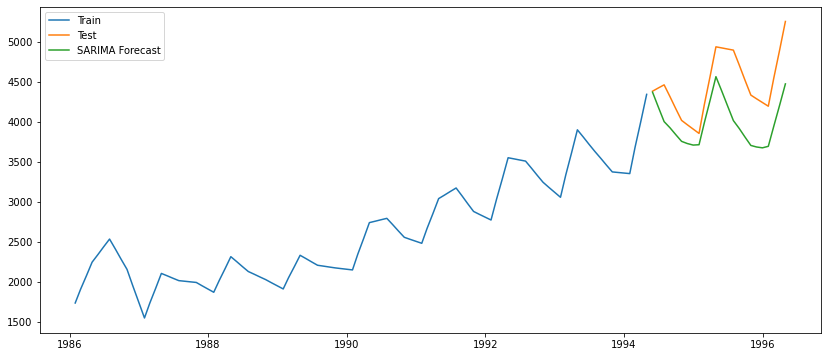

In [164]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima= model_fit_s.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

y_hat_sarima = y_hat_sarima.cumsum()

y_hat_sarima= y_hat_sarima.add(data_boxcox.Sales[0])

y_hat_sarima= np.exp(y_hat_sarima)
plt.figure(figsize=(14,6))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima[test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


### Model Evaluation

In [165]:
# Root mean square error for ARIMA model
rmse_SARIMA= np.sqrt(mean_squared_error(test_data,y_hat_sarima[test_data.index.min():])).round(2)
rmse_SARIMA

519.18

### MAPE (Mean Absolute Percent Error)

In [166]:
mape_sarima = MAPE(y_hat_sarima,test_data.Sales)
mape_sarima

10.227467727201613

### Analysing the Residuals

In [167]:
model_residual_s = model_fit_s.resid
model_residual_s.mean()


-0.0009523407222677594

In [168]:
# Residuals must be stationary
adf_test(model_residual_s)


Reject the null hypothesis
Data is stationary


### No autocorrelation between residuals

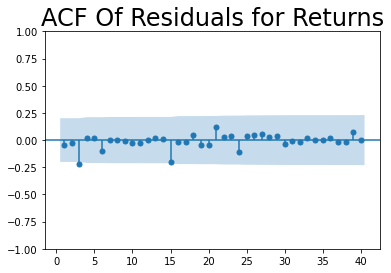

In [169]:
tsa_plots.plot_acf(model_residual_s, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()


### Residuals must be random

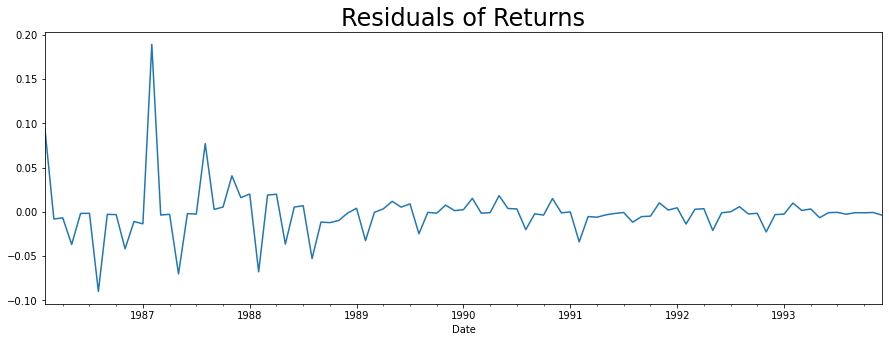

In [170]:
model_residual_s.plot(figsize=(15,5))
plt.title("Residuals of Returns", size=24)
plt.show()


### comparing model with differente Transformation Technique

In [171]:
#Compareing the results 

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul",
                        "Triple_Exp_mul","ARIMA","SARIMA"]),\
        "MAPE(%)":pd.Series([mape_ses,mape_des,mape_ad_tes,mape_mul_ad_tes,mape_ad_mul_tes,mape_mul_tes,mape_arima,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_des,test_rmse_ad_tes,test_rmse_mul_ad_tes,test_rmse_ad_mul_tes,test_rmse_mul_tes,rmse_ARIMA,rmse_SARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation


,Models,MAPE(%),RMSE_Values
0,Triple_Exp_mul_ad,3.636542,210.001406
1,Triple_Exp_ad_mul,5.227066,270.840048
2,ARIMA,6.444864,326.700000
3,Triple_Exp_mul,6.308444,366.464335
4,Simple_Exp,6.620374,382.447742
5,SARIMA,10.227468,519.180000
6,Triple_Exp_ad,37.824069,1938.637795
7,Double_Exp,89.494625,4549.907951


#### Holts winter exponential smoothing with multiplicative seasonality and additive trend did very well as compared to other methods and Models

### Retrain the model on the full data, and forecast the future

In [201]:
final_model  = ExponentialSmoothing(Inter_df,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
forecast = final_model.predict(len(Inter_df),len(Inter_df)+36).rename('Forecast')
forecast

1996-05-31    5230.249209
1996-06-30    5206.095003
1996-07-31    5184.085870
1996-08-31    5016.534390
1996-09-30    4852.829663
1996-10-31    4688.238555
1996-11-30    4609.548154
1996-12-31    4528.979085
1997-01-31    4446.463735
1997-02-28    4827.858247
1997-03-31    5207.800896
1997-04-30    5592.137594
1997-05-31    5562.692757
1997-06-30    5535.259746
1997-07-31    5510.141094
1997-08-31    5330.406302
1997-09-30    5154.884085
1997-10-31    4978.542559
1997-11-30    4893.514204
1997-12-31    4806.556779
1998-01-31    4717.599317
1998-02-28    5120.762042
1998-03-31    5522.166260
1998-04-30    5928.013605
1998-05-31    5895.136306
1998-06-30    5864.424490
1998-07-31    5836.196317
1998-08-31    5644.278214
1998-09-30    5456.938506
1998-10-31    5268.846563
1998-11-30    5177.480253
1998-12-31    5084.134473
1999-01-31    4988.734900
1999-02-28    5413.665838
1999-03-31    5836.531623
1999-04-30    6263.889615
1999-05-31    6227.579854
Freq: M, Name: Forecast, dtype: float6

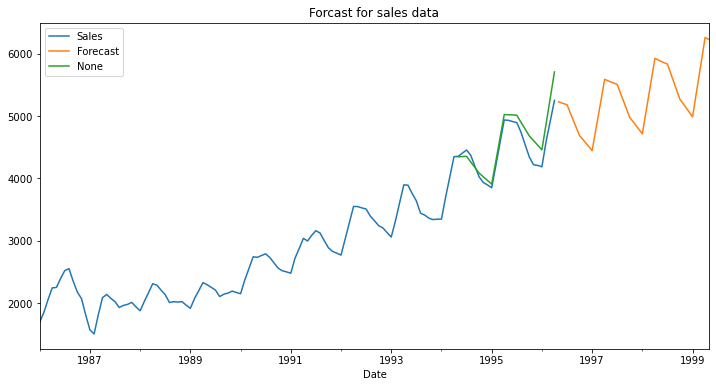

In [205]:
# Plot predictions against known values
title = 'Forcast for sales data'
ylabel='sales'
xlabel='Period' 

Inter_df['Sales'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
test_pred_mul_ad_tes.plot(legend=True)
plt.show()

## Conclusion
+ We can see that there is an increasing trend, So trend is not constant. Variance is also not constant. Hence the time serise is not stationary.
+ Quarter Q2 have higher sales in the years.Sales increase every year.
+ Highest sales are made in April,May,June,July month and then decreases in January.Sales are increasing gradually from 1986 to 1995.We don't have enough data for 1996
+ We can see that AR model has done reasonably good job but not better than Holt's method. We souldn't compare it with Holt's method. Because Holt's method captures seasonality
+ Holts winter exponential smoothing with multiplicative seasonality and additive trend did very well as compared to other methods and Models
